## Jupyter Notebook: Data Exploration

This notebook will cover the following sections:

- Loading Data
- Exploring Annotations

In [8]:

# All libraries used in this notebook
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [9]:
def load_json_to_dataframe(file_path):
    """
    Load JSON data from the file and convert to pandas DataFrames.
    The JSON file is expected to have 'categories', 'images', and 'annotations' sections.
    
    :param file_path: Path to the JSON file.
    :return: Tuple of pandas DataFrames (categories_df, images_df, annotations_df)
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Convert categories to DataFrame
    categories_df = pd.DataFrame(data['categories'])
    
    # Convert images to DataFrame
    images_df = pd.DataFrame(data['images'])
    
    # Convert annotations to DataFrame
    annotations_df = pd.DataFrame(data['annotations'])
    
    return categories_df, images_df, annotations_df

def merge_dataframes(images_df, annotations_df, categories_df):
    """
    Merge the images, annotations, and categories DataFrames.
    
    :param images_df: DataFrame containing images data.
    :param annotations_df: DataFrame containing annotations data.
    :param categories_df: DataFrame containing categories data.
    :return: Merged DataFrame.
    """
    # Merge annotations with images on image_id
    merged_df = pd.merge(annotations_df, images_df, left_on='image_id', right_on='id', suffixes=('_annotation', '_image'))
    
    # Merge the resulting DataFrame with categories on category_id
    merged_df = pd.merge(merged_df, categories_df, left_on='category_id', right_on='id', suffixes=('_merged', '_category'))
    
    return merged_df

In [10]:
# Load the train, validation, and test data
train_categories_df, train_images_df, train_annotations_df = load_json_to_dataframe('/Users/heliyahasani/Desktop/lensor_case_study/dataset/annotations/instances_train.json')
validation_categories_df, validation_images_df, validation_annotations_df = load_json_to_dataframe('/Users/heliyahasani/Desktop/lensor_case_study/dataset/annotations/instances_val.json')
test_categories_df, test_images_df, test_annotations_df = load_json_to_dataframe('/Users/heliyahasani/Desktop/lensor_case_study/dataset/annotations/instances_test.json')

# Merge the data
train_merged_df = merge_dataframes(train_images_df, train_annotations_df, train_categories_df)
validation_merged_df = merge_dataframes(validation_images_df, validation_annotations_df, validation_categories_df)
test_merged_df = merge_dataframes(test_images_df, test_annotations_df, test_categories_df)

### Exploring Annotations

In [11]:
def plot_category_distribution(df, title):
    """
    Plot the distribution of categories.

    :param df: DataFrame containing the data.
    :param title: Title of the plot.
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(y='name', data=df, order=df['name'].value_counts().index)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

def get_category_counts(df):
    """
    Get the count of categories.

    :param df: DataFrame containing the data.
    :return: DataFrame with category counts.
    """
    return df['name'].value_counts().reset_index().rename(columns={'index': 'Category', 'name': 'Count'})

def get_image_dimensions(df):
    """
    Get a summary of image dimensions.

    :param df: DataFrame containing image data.
    :return: DataFrame with image dimensions summary.
    """
    dimensions = df[['height', 'width']].describe().transpose()
    return dimensions

def plot_bbox_area_distribution(df, title):
    """
    Plot the distribution of bounding box areas.

    :param df: DataFrame containing the data.
    :param title: Title of the plot.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df['area'], bins=50, kde=True)
    plt.title(title)
    plt.xlabel('Bounding Box Area')
    plt.ylabel('Frequency')
    plt.show()

def plot_annotation_count_per_image(df, title):
    """
    Plot the distribution of the number of annotations per image.

    :param df: DataFrame containing annotations data.
    :param title: Title of the plot.
    """
    annotation_counts = df['image_id'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.histplot(annotation_counts, bins=50, kde=True)
    plt.title(title)
    plt.xlabel('Number of Annotations')
    plt.ylabel('Frequency')
    plt.show()

def plot_bbox_dimensions_distribution(df, title):
    """
    Plot the distribution of bounding box dimensions.

    :param df: DataFrame containing annotations data.
    :param title: Title of the plot.
    """
    df['bbox_width'] = df['bbox'].apply(lambda x: x[2])
    df['bbox_height'] = df['bbox'].apply(lambda x: x[3])
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['bbox_width'], bins=50, kde=True, color='blue', label='Width')
    sns.histplot(df['bbox_height'], bins=50, kde=True, color='green', label='Height')
    plt.title(title)
    plt.xlabel('Bounding Box Dimension')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_bbox_aspect_ratio_distribution(df, title):
    """
    Plot the distribution of bounding box aspect ratios.

    :param df: DataFrame containing annotations data.
    :param title: Title of the plot.
    """
    df['bbox_aspect_ratio'] = df['bbox'].apply(lambda x: x[2] / x[3] if x[3] != 0 else 0)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['bbox_aspect_ratio'], bins=50, kde=True)
    plt.title(title)
    plt.xlabel('Bounding Box Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()

def plot_image_resolution_distribution(df, title):
    """
    Plot the distribution of image resolutions.

    :param df: DataFrame containing image data.
    :param title: Title of the plot.
    """
    df['resolution'] = df['width'] * df['height']
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['resolution'], bins=50, kde=True)
    plt.title(title)
    plt.xlabel('Image Resolution (Width x Height)')
    plt.ylabel('Frequency')
    plt.show()


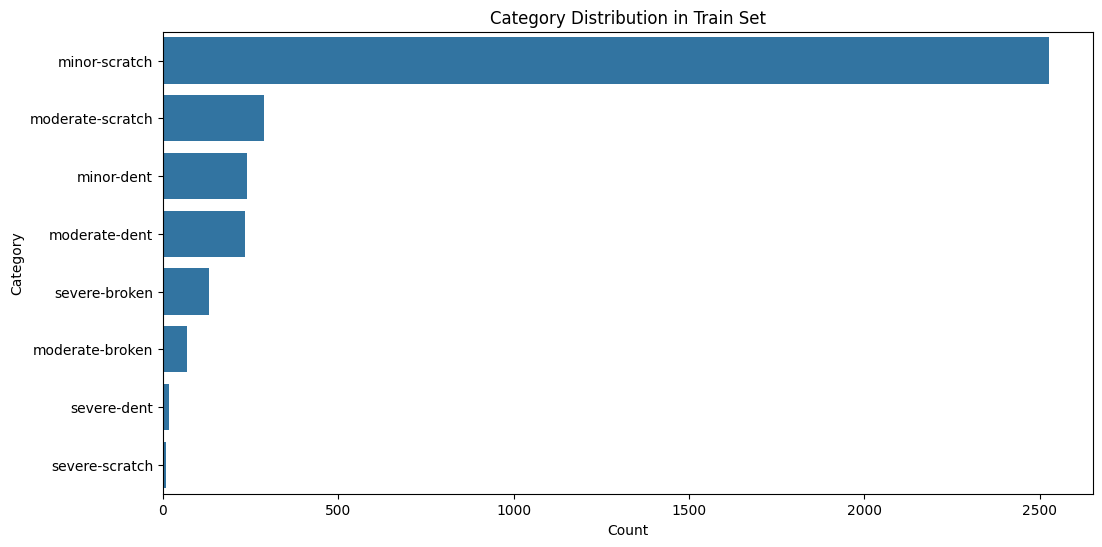

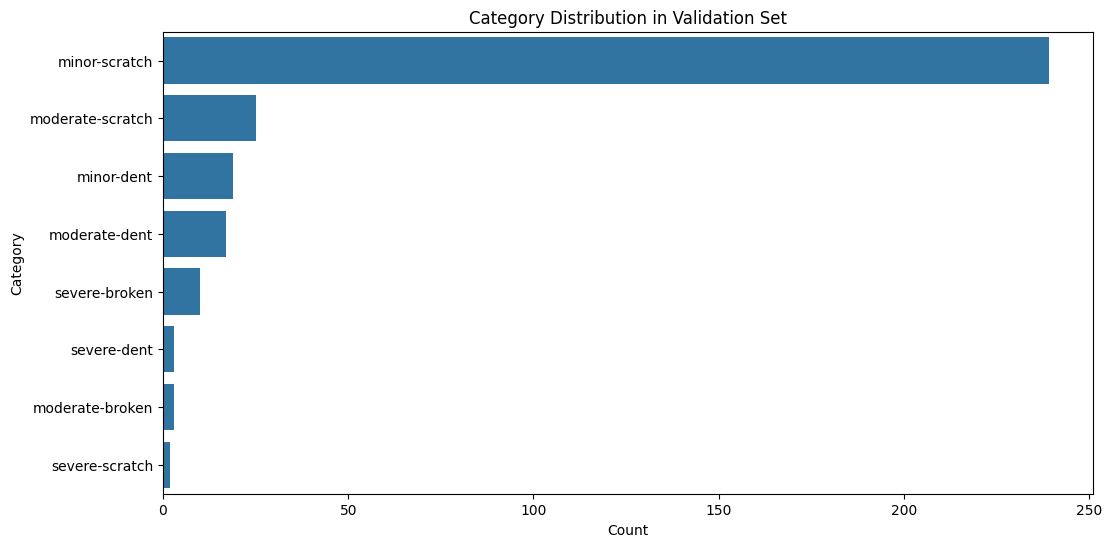

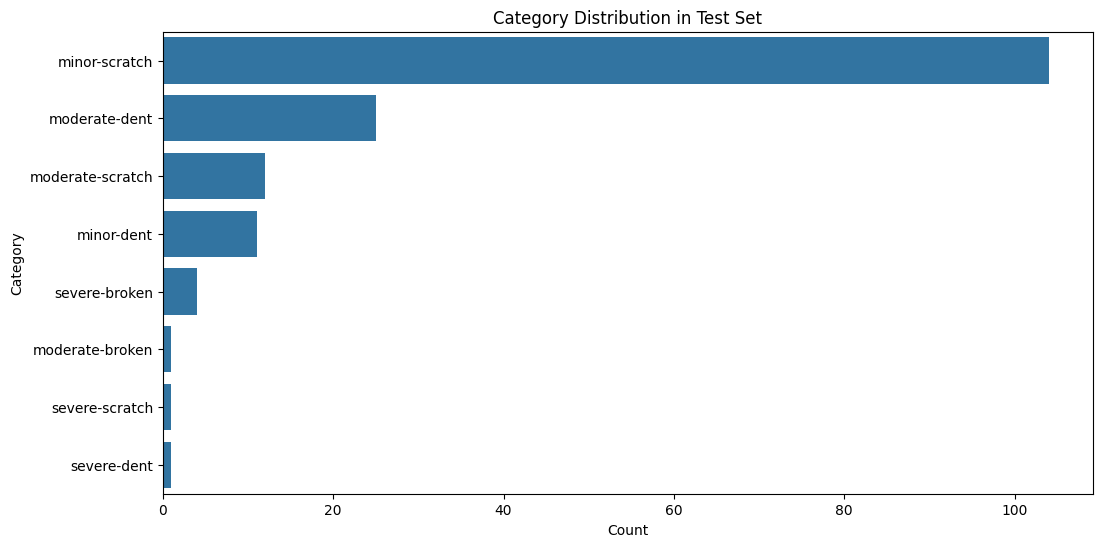

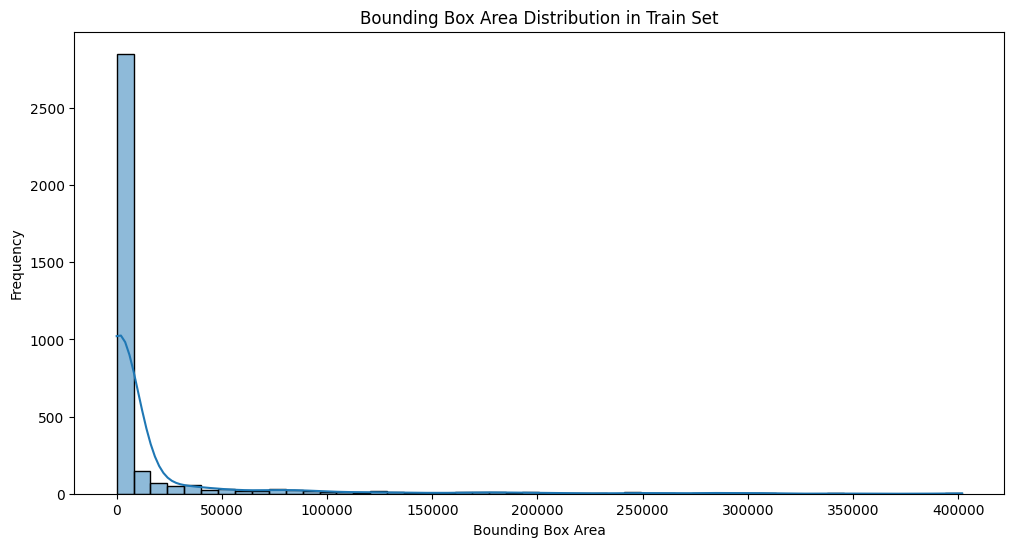

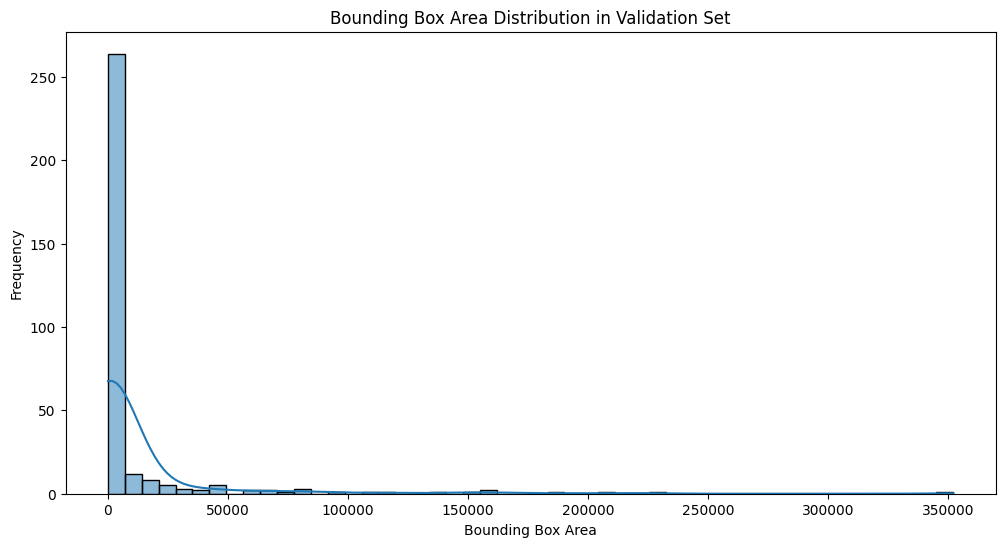

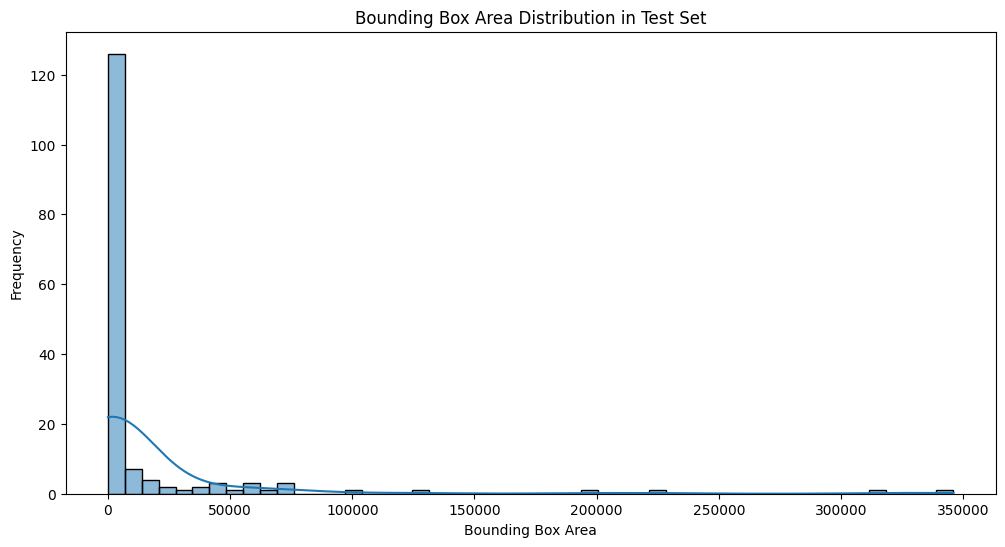

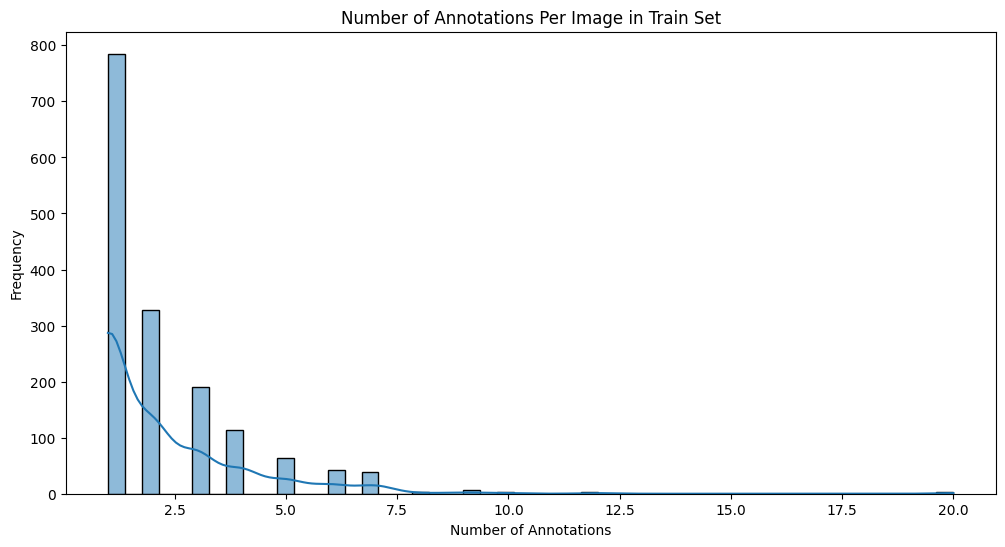

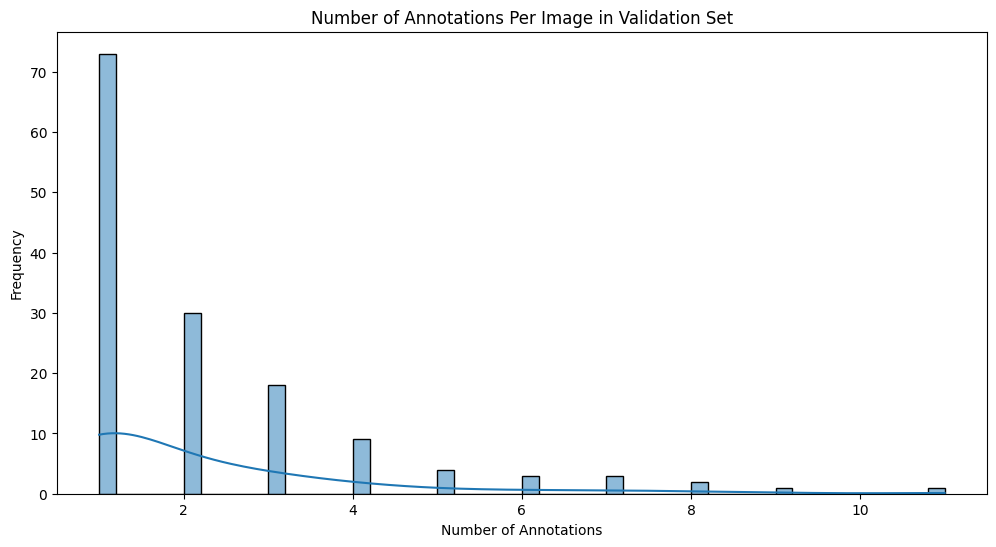

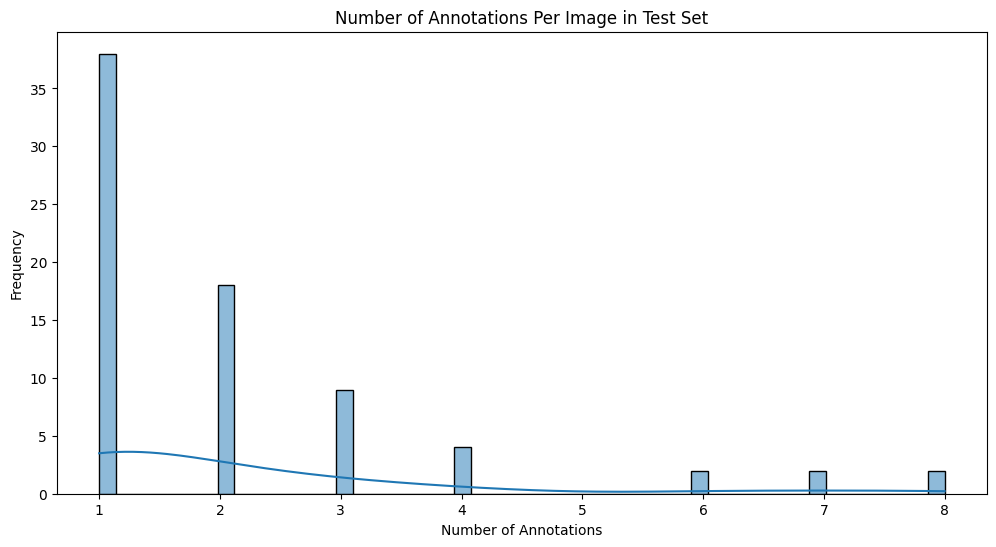

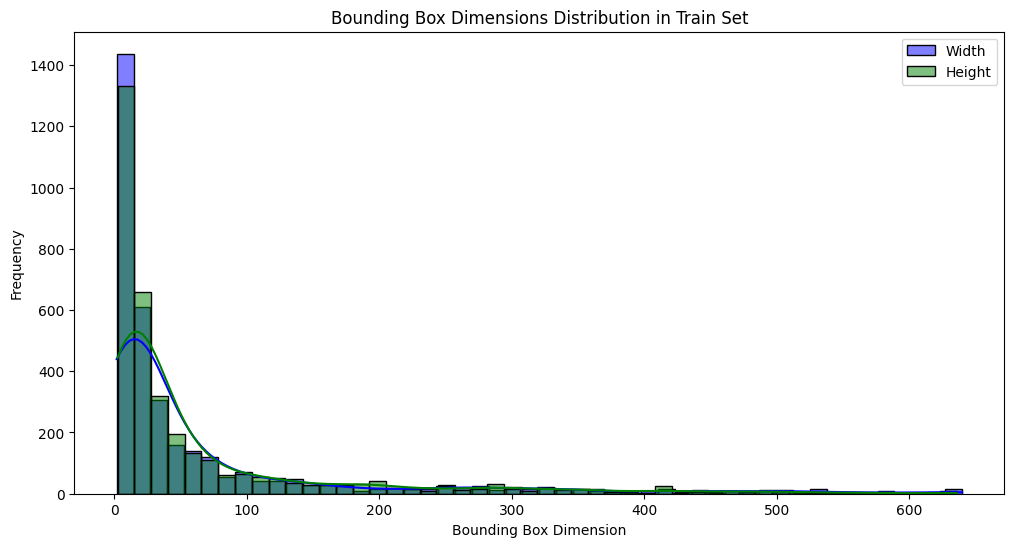

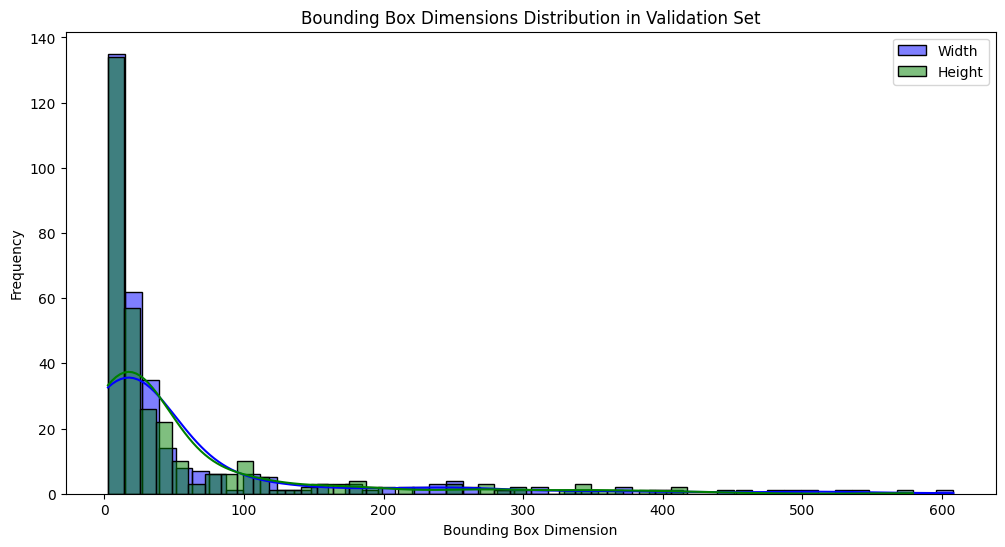

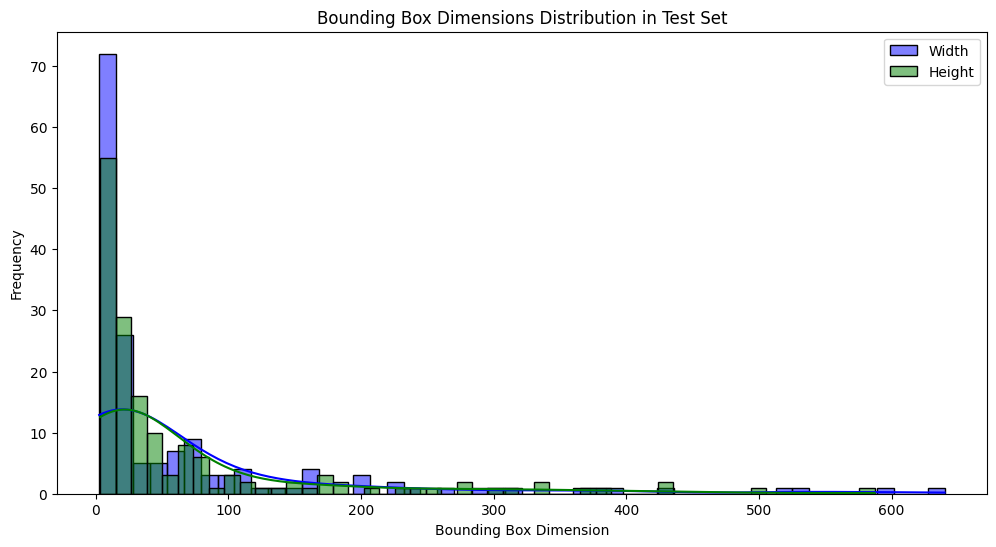

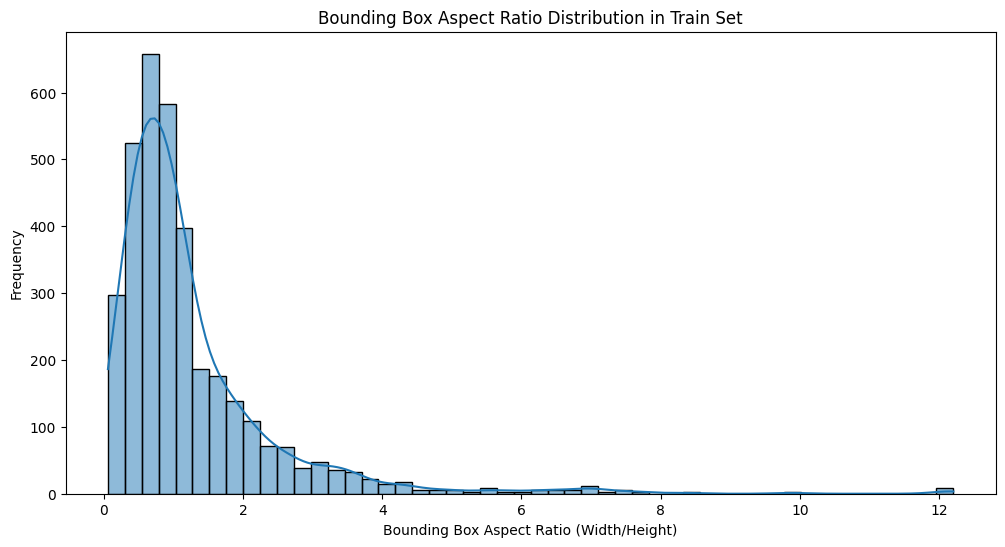

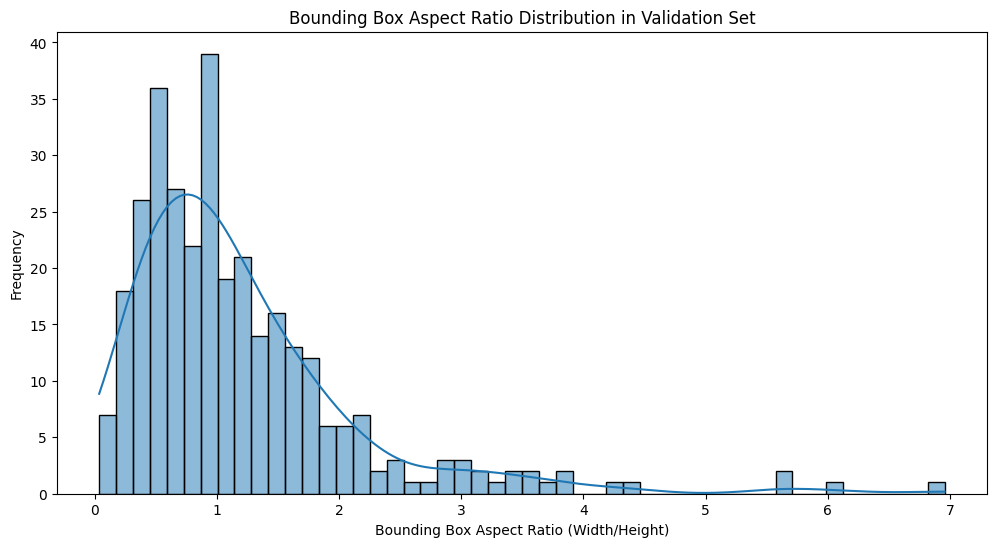

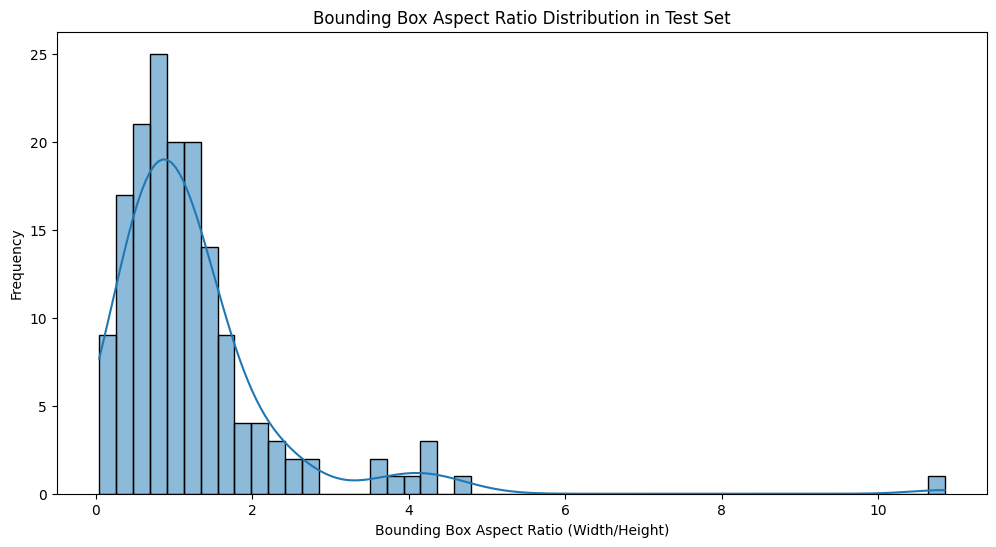

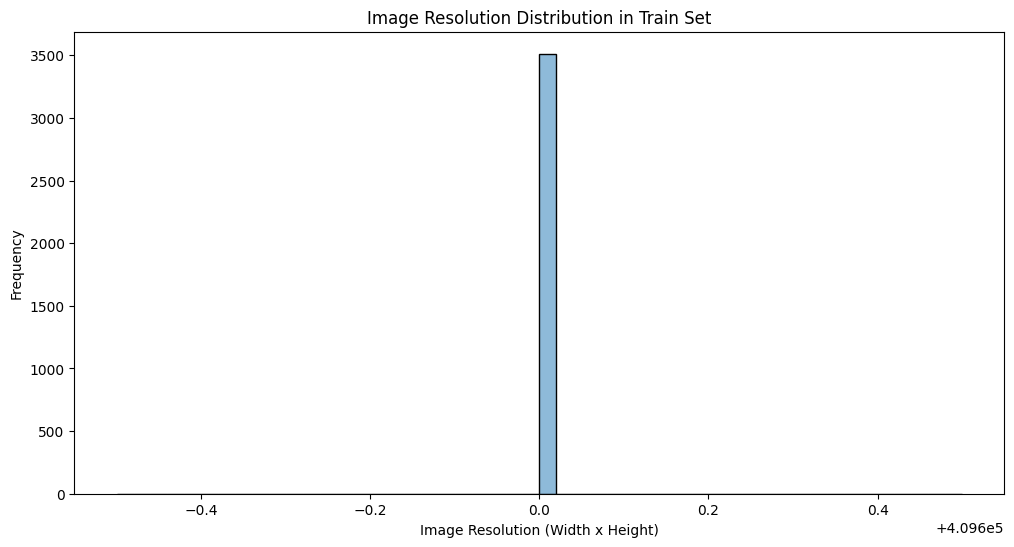

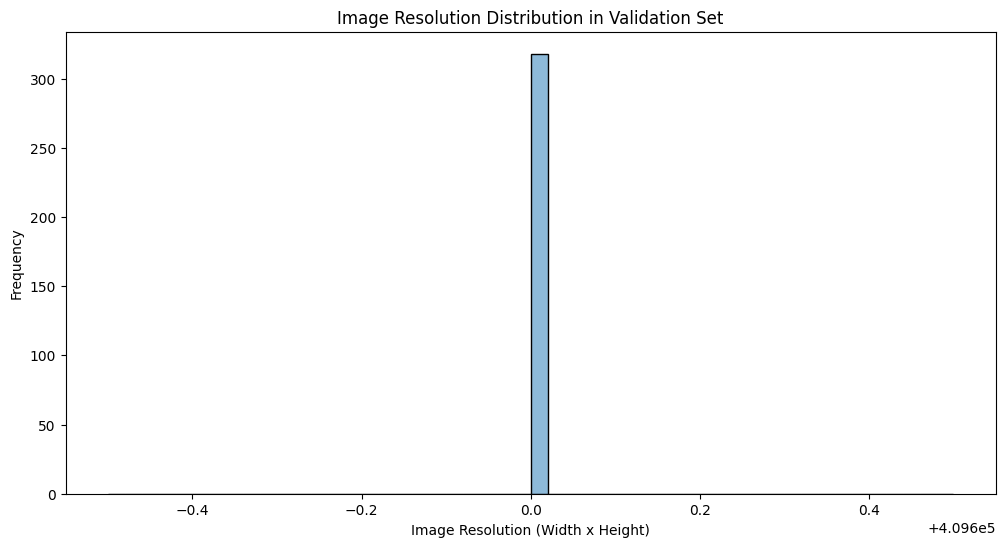

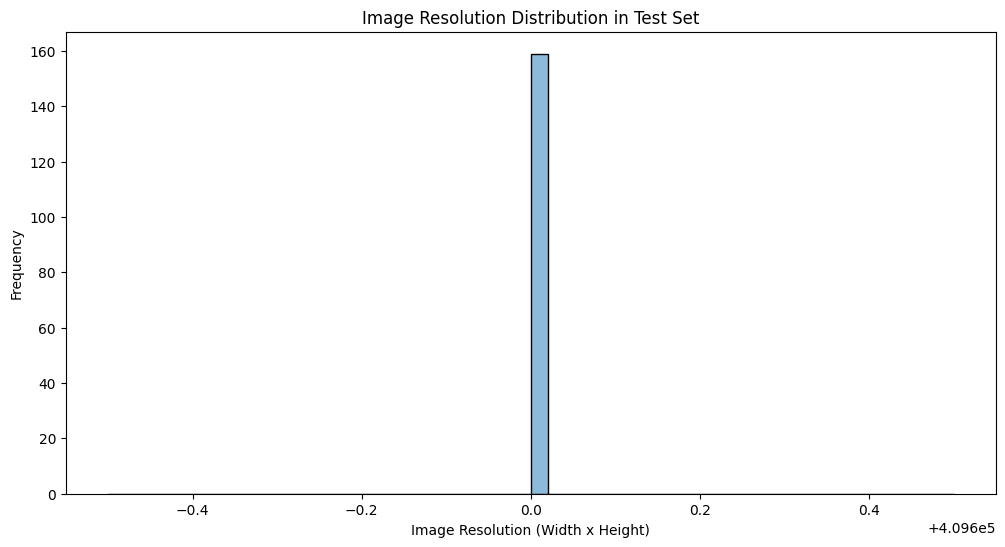

In [12]:
# Plot Category Distribution
plot_category_distribution(train_merged_df, 'Category Distribution in Train Set')
plot_category_distribution(validation_merged_df, 'Category Distribution in Validation Set')
plot_category_distribution(test_merged_df, 'Category Distribution in Test Set')

# Plot Bounding Box Area Distribution
plot_bbox_area_distribution(train_merged_df, 'Bounding Box Area Distribution in Train Set')
plot_bbox_area_distribution(validation_merged_df, 'Bounding Box Area Distribution in Validation Set')
plot_bbox_area_distribution(test_merged_df, 'Bounding Box Area Distribution in Test Set')

# Plot Annotation Count Per Image
plot_annotation_count_per_image(train_merged_df, 'Number of Annotations Per Image in Train Set')
plot_annotation_count_per_image(validation_merged_df, 'Number of Annotations Per Image in Validation Set')
plot_annotation_count_per_image(test_merged_df, 'Number of Annotations Per Image in Test Set')

# Plot Bounding Box Dimensions Distribution
plot_bbox_dimensions_distribution(train_merged_df, 'Bounding Box Dimensions Distribution in Train Set')
plot_bbox_dimensions_distribution(validation_merged_df, 'Bounding Box Dimensions Distribution in Validation Set')
plot_bbox_dimensions_distribution(test_merged_df, 'Bounding Box Dimensions Distribution in Test Set')

# Plot Bounding Box Aspect Ratio Distribution
plot_bbox_aspect_ratio_distribution(train_merged_df, 'Bounding Box Aspect Ratio Distribution in Train Set')
plot_bbox_aspect_ratio_distribution(validation_merged_df, 'Bounding Box Aspect Ratio Distribution in Validation Set')
plot_bbox_aspect_ratio_distribution(test_merged_df, 'Bounding Box Aspect Ratio Distribution in Test Set')

# Plot Image Resolution Distribution
plot_image_resolution_distribution(train_merged_df, 'Image Resolution Distribution in Train Set')
plot_image_resolution_distribution(validation_merged_df, 'Image Resolution Distribution in Validation Set')
plot_image_resolution_distribution(test_merged_df, 'Image Resolution Distribution in Test Set')


In [13]:
# Exporting train_merged_df to CSV
train_merged_df.to_csv('train_merged.csv', index=False)

# Exporting validation_merged_df to CSV
validation_merged_df.to_csv('validation_merged.csv', index=False)

# Exporting test_merged_df to CSV
test_merged_df.to_csv('test_merged.csv', index=False)

# Appendix 

##### In future I will create an endpoint and connect LLM for analysis hence I have stored results in csv.

In [14]:
# Category Counts
train_category_counts = get_category_counts(train_merged_df)
validation_category_counts = get_category_counts(validation_merged_df)
test_category_counts = get_category_counts(test_merged_df)

# Image Dimensions Summary
train_image_dimensions = get_image_dimensions(train_merged_df)
validation_image_dimensions = get_image_dimensions(validation_merged_df)
test_image_dimensions = get_image_dimensions(test_merged_df)

# Bounding Box Area Statistics
train_bbox_area_stats = train_merged_df['area'].describe()
validation_bbox_area_stats = validation_merged_df['area'].describe()
test_bbox_area_stats = test_merged_df['area'].describe()

# Annotation Count Per Image
train_annotation_counts = train_merged_df['image_id'].value_counts().describe()
validation_annotation_counts = validation_merged_df['image_id'].value_counts().describe()
test_annotation_counts = test_merged_df['image_id'].value_counts().describe()

# Bounding Box Dimensions Summary
train_bbox_dimensions_stats = train_merged_df[['bbox_width', 'bbox_height']].describe()
validation_bbox_dimensions_stats = validation_merged_df[['bbox_width', 'bbox_height']].describe()
test_bbox_dimensions_stats = test_merged_df[['bbox_width', 'bbox_height']].describe()

# Bounding Box Aspect Ratio Summary
train_bbox_aspect_ratio_stats = train_merged_df['bbox_aspect_ratio'].describe()
validation_bbox_aspect_ratio_stats = validation_merged_df['bbox_aspect_ratio'].describe()
test_bbox_aspect_ratio_stats = test_merged_df['bbox_aspect_ratio'].describe()

# Image Resolution Summary
train_image_resolution_stats = train_merged_df['resolution'].describe()
validation_image_resolution_stats = validation_merged_df['resolution'].describe()
test_image_resolution_stats = test_merged_df['resolution'].describe()

# Save statistics to CSV
train_category_counts.to_csv('train_category_counts.csv', index=False)
validation_category_counts.to_csv('validation_category_counts.csv', index=False)
test_category_counts.to_csv('test_category_counts.csv', index=False)

train_image_dimensions.to_csv('train_image_dimensions.csv')
validation_image_dimensions.to_csv('validation_image_dimensions.csv')
test_image_dimensions.to_csv('test_image_dimensions.csv')

train_bbox_area_stats.to_csv('train_bbox_area_stats.csv')
validation_bbox_area_stats.to_csv('validation_bbox_area_stats.csv')
test_bbox_area_stats.to_csv('test_bbox_area_stats.csv')

train_annotation_counts.to_csv('train_annotation_counts.csv')
validation_annotation_counts.to_csv('validation_annotation_counts.csv')
test_annotation_counts.to_csv('test_annotation_counts.csv')

train_bbox_dimensions_stats.to_csv('train_bbox_dimensions_stats.csv')
validation_bbox_dimensions_stats.to_csv('validation_bbox_dimensions_stats.csv')
test_bbox_dimensions_stats.to_csv('test_bbox_dimensions_stats.csv')

train_bbox_aspect_ratio_stats.to_csv('train_bbox_aspect_ratio_stats.csv')
validation_bbox_aspect_ratio_stats.to_csv('validation_bbox_aspect_ratio_stats.csv')
test_bbox_aspect_ratio_stats.to_csv('test_bbox_aspect_ratio_stats.csv')

train_image_resolution_stats.to_csv('train_image_resolution_stats.csv')
validation_image_resolution_stats.to_csv('validation_image_resolution_stats.csv')
test_image_resolution_stats.to_csv('test_image_resolution_stats.csv')


# Summary and Next Steps

## Key Findings:

- **Class Imbalance:** Both the train and test sets exhibit class imbalance, with certain categories being significantly more frequent.
- **Image Dimensions and Resolutions:** Image dimensions and resolutions are consistent, but resizing to a fixed size (e.g., 224x224) is recommended.
- **Bounding Box Areas and Dimensions:** Bounding box areas and dimensions vary, with many small objects present.
- **Number of Annotations:** Most images have a small number of annotations, typically between 1 and 5.
- **Aspect Ratios:** Common aspect ratios should be considered when setting up anchor boxes for the detection model.

## Next Steps:

### Data Augmentation:

- **Address Class Imbalance:** Perform data augmentation to address class imbalance, especially for underrepresented categories.
- **Augmentation Techniques:** Use techniques such as rotation, flipping, scaling, and color adjustments.

### Preprocessing:

- **Resize Images:** Resize all images to a fixed size (e.g., 224x224) for consistency.
- **Normalize Pixel Values:** Normalize image pixel values to improve model training.

### Model Configuration:

- **Customize Anchor Boxes:** Customize anchor boxes in the object detection model to match the common bounding box sizes and aspect ratios in the dataset.
- **Adjust Maximum Detections:** Ensure the model can handle varying numbers of objects per image by adjusting the maximum number of detections.

### Evaluation:

- **Regular Evaluation:** Regularly evaluate the model on the test set to monitor performance and adjust training strategies as needed.

By following these recommendations, you can prepare the dataset for training with ResNet and ensure that the model is well-suited to handle the characteristics of your data.
